In [90]:
# Purpose of this is to scrape winshare data from basketball-reference.com
### THINGS TO DO NEXT ####
# SEPARATE OUT THE WINSHARE LEADER FOR EACH WIN TOTAL
# ADD TRENDLINE TO WS/TWIN GRAPH
# GRAPH YEARLY LEADERS OVER TIME
# GRAPH YEARLY LEADERS BY WS 
# HOW TO SPEED IT UP
# HAVE LIST OF PLAYERS. FOR INSTANCE OF PLAYERS NAME, APPEND TEAM FOR A GIVEN YEAR.

In [91]:
#import the library used to query website
import urllib.request
#specify the url
site = "https://www.basketball-reference.com/leaders/ws_top_10.html"
#Query the website and return the html to the variable 'page'
page = urllib.request.urlopen(site)


In [92]:
#import the Beautiful Soup functions to parse the data returned form the website
from bs4 import BeautifulSoup
#Parse the html in the 'page' variable and store it in Beautiful Soup format
soup = BeautifulSoup(page)

C:\Users\Drew\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Drew\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [93]:
#Found data location by using print(soup.prettify()) and searching for the data.
#print(soup.prettify())

In [94]:
table = soup.table


In [95]:
# accesses table with year, player, winshares and puts info into a single list of strings.
raw_list = []
for string in table.stripped_strings:
    if string != '*':    #removes hall of fame denotation
        raw_list.append(string)
raw_list = raw_list[13:]   #removes unneccessary 


In [96]:
# create list with years, top 10 leaders in win shares, and 
years = []
for i in raw_list:
    x = 0
    if i[0]=='2' or i[0] == '1':
        while x < 10:
            (years.append(i))
            x +=1
        x=0

league = []
for i in raw_list:
    if len(i)==3:
        while x < 10:
            league.append(i)
            x += 1
        x = 0

players = []
for player in raw_list:
    if len(player) != 3 and player[0].isalpha():
        players.append(player)

player_links = []
for a in table.find_all('a'):
    if 'leagues' not in a['href']:
        player_links.append(a['href'])

win_shares = []    
for num in raw_list:
    if num[0] == "(":
        win_shares.append(float(num[1:-1]))


In [97]:
# Use Beautiful Soup to find player's team for each year and then their win total.
# Go to PLAYER page to get TEAM for YEAR -> go to YEAR's TEAM page for WINS


site = 'https://www.basketball-reference.com/players/d/duranke01.html'
page = urllib.request.urlopen(site)

#Parse the html in the 'page' variable and store it in Beautiful Soup format
# use year to pull team info from player page
test_year = '2010'
test_team = 'N/A'
soup = BeautifulSoup(page)
for i in soup.table.find_all('a'):
    if (test_year in i['href']) and (i['href'][1] == 't'):
        test_team = (i['href'][7:10])
# use team and year to pull wins from 
site = 'https://www.basketball-reference.com/teams/%s/%s.html' % (test_team, test_year)
page = urllib.request.urlopen(site)
soup = BeautifulSoup(page)
ps = (list(soup.find_all('p')))
team_wins = int((str(ps[2]))[40:42])


C:\Users\Drew\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Drew\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [98]:
# Use Beautiful Soup to find player's team for each year and then their win total.
# Go to PLAYER page to get TEAM for YEAR -> go to YEAR's TEAM page for WINS
# CREATE SITE TO PULL TEAM WINS FROM
teams = []
# use year to pull team info from player page
#change range depending on testing
for i in range(300):
    fx_player = players[i]
    fx_link = player_links[i]
    if years[i][:2] + years[i][-2:] == '1900':
        fx_year = '2000'
    else:
        fx_year = years[i][:2] + years[i][-2:]
    fx_league = league[i]
    site = 'https://www.basketball-reference.com/%s' % (fx_link)
    page = urllib.request.urlopen(site)
    soup = BeautifulSoup(page)
    for j in soup.table.find_all('a'):
        if (fx_year in j['href']) and (j['href'][1] == 't'):
            fx_team = (j['href'][7:10])
            teams.append(fx_team)
            break
    print(fx_year, fx_player, fx_team)


C:\Users\Drew\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Drew\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


2019 G. Antetokounmpo MIL
2019 J. Harden HOU
2019 R. Gobert UTA
2019 P. George OKC
2019 N. Jokic DEN
2019 D. Lillard POR
2019 K. Towns MIN
2019 K. Durant GSW
2019 A. Davis NOP
2019 N. Vucevic ORL
2018 J. Harden HOU
2018 K. Towns MIN
2018 L. James CLE
2018 A. Davis NOP
2018 D. Lillard POR
2018 G. Antetokounmpo MIL
2018 L. Aldridge SAS
2018 N. Jokic DEN
2018 K. Durant GSW
2018 A. Drummond DET
2017 J. Harden HOU
2017 R. Gobert UTA
2017 J. Butler CHI
2017 K. Leonard SAS
2017 R. Westbrook OKC
2017 L. James CLE
2017 K. Towns MIN
2017 S. Curry GSW
2017 I. Thomas BOS
2017 G. Antetokounmpo MIL
2016 S. Curry GSW
2016 K. Durant OKC
2016 R. Westbrook OKC
2016 K. Leonard SAS
2016 L. James CLE
2016 J. Harden HOU
2016 C. Paul LAC
2016 K. Lowry TOR
2016 D. Jordan LAC
2016 D. Green GSW
2015 J. Harden HOU
2015 C. Paul LAC
2015 S. Curry GSW
2015 A. Davis NOP
2015 D. Jordan LAC
2015 J. Butler CHI
2015 R. Westbrook OKC
2015 D. Lillard POR
2015 P. Gasol CHI
2015 K. Irving CLE
2014 K. Durant OKC
2014 L. Jame

In [99]:
# use team and year to pull wins from
team_wins = []

for k in range(300):
    fx_team = teams[k]
    if years[k][:2] + years[k][-2:] == '1900':
        fx_year = '2000'
    else:
        fx_year = years[k][:2] + years[k][-2:]
    site = 'https://www.basketball-reference.com/teams/%s/%s.html' % (fx_team, fx_year)
    page = urllib.request.urlopen(site)
    soup = BeautifulSoup(page)
    paragraphs = (list(soup.find_all('p')))
    fx_wins = int((str(paragraphs[2]))[40:42])
    team_wins.append(fx_wins)
    print(players[k], years[k], teams[k], fx_wins)

C:\Users\Drew\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Drew\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


G. Antetokounmpo 2018-19 MIL 52
J. Harden 2018-19 HOU 44
R. Gobert 2018-19 UTA 40
P. George 2018-19 OKC 42
N. Jokic 2018-19 DEN 46
D. Lillard 2018-19 POR 42
K. Towns 2018-19 MIN 32
K. Durant 2018-19 GSW 47
A. Davis 2018-19 NOP 30
N. Vucevic 2018-19 ORL 33
J. Harden 2017-18 HOU 65
K. Towns 2017-18 MIN 47
L. James 2017-18 CLE 50
A. Davis 2017-18 NOP 48
D. Lillard 2017-18 POR 49
G. Antetokounmpo 2017-18 MIL 44
L. Aldridge 2017-18 SAS 47
N. Jokic 2017-18 DEN 46
K. Durant 2017-18 GSW 58
A. Drummond 2017-18 DET 39
J. Harden 2016-17 HOU 55
R. Gobert 2016-17 UTA 51
J. Butler 2016-17 CHI 41
K. Leonard 2016-17 SAS 61
R. Westbrook 2016-17 OKC 47
L. James 2016-17 CLE 51
K. Towns 2016-17 MIN 31
S. Curry 2016-17 GSW 67
I. Thomas 2016-17 BOS 53
G. Antetokounmpo 2016-17 MIL 42
S. Curry 2015-16 GSW 73
K. Durant 2015-16 OKC 55
R. Westbrook 2015-16 OKC 55
K. Leonard 2015-16 SAS 67
L. James 2015-16 CLE 57
J. Harden 2015-16 HOU 41
C. Paul 2015-16 LAC 53
K. Lowry 2015-16 TOR 56
D. Jordan 2015-16 LAC 53
D. G

In [100]:
print(len(years), 
      len(league),
      len(players[:100]),
      len(win_shares),
      len(player_links),
      len(teams), 
      len(team_wins))

820 820 100 820 820 300 300


In [101]:
# Create dataframe to perform analysis on
import pandas as pd

df = pd.DataFrame({'Year':years[:300],
                   'League':league[:300],
                   'Player':players[:300],
                    'Win shares':win_shares[:300],
                   'Link':player_links[:300],
                   'Team':teams,
                   'Team Wins':team_wins})

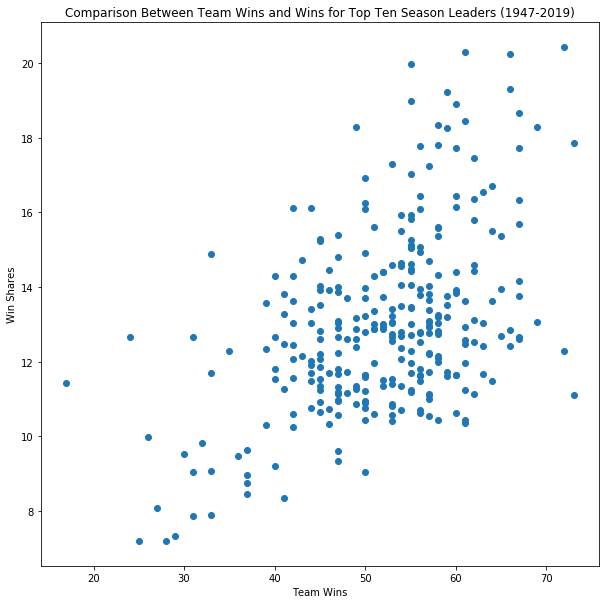

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(df['Team Wins'], df['Win shares'])
plt.ylabel('Win Shares')
plt.xlabel('Team Wins')
plt.title('Comparison Between Team Wins and Wins for Top Ten Season Leaders (1947-2019)')
plt.show()

In [103]:
# look at frequency 
from collections import Counter
leaders = Counter(players[:300])
print(leaders)

Counter({'L. James': 13, 'K. Malone': 13, 'D. Nowitzki': 11, 'D. Robinson': 11, 'T. Duncan': 9, 'J. Stockton': 9, 'J. Harden': 8, 'K. Durant': 8, 'C. Paul': 8, 'K. Bryant': 8, 'K. Garnett': 7, "S. O'Neal": 7, 'G. Payton': 7, 'M. Jordan': 7, 'R. Miller': 7, 'S. Curry': 5, 'P. Gasol': 5, 'C. Billups': 5, 'S. Pippen': 5, 'R. Westbrook': 4, 'D. Howard': 4, 'D. Wade': 4, 'P. Pierce': 4, 'S. Marion': 4, 'C. Drexler': 4, 'P. Ewing': 4, 'C. Barkley': 4, 'G. Antetokounmpo': 3, 'D. Lillard': 3, 'K. Towns': 3, 'A. Davis': 3, 'D. Jordan': 3, 'K. Love': 3, 'B. Griffin': 3, 'A. Stoudemire': 3, 'A. Iverson': 3, 'S. Nash': 3, 'E. Brand': 3, 'T. McGrady': 3, 'G. Hill': 3, 'R. Gobert': 2, 'N. Jokic': 2, 'J. Butler': 2, 'K. Leonard': 2, 'K. Lowry': 2, 'J. Noah': 2, 'R. Allen': 2, 'Y. Ming': 2, 'G. Arenas': 2, 'J. Kidd': 2, 'V. Carter': 2, 'A. Mourning': 2, 'D. Mutombo': 2, 'T. Hardaway': 2, 'D. Schrempf': 2, 'H. Olajuwon': 2, 'M. Johnson': 2, 'T. Porter': 2, 'P. George': 1, 'N. Vucevic': 1, 'L. Aldridge'

In [104]:
ratio = []
for row in df.iterrows():
    ratio.append(float(row[1]['Win shares'])/float(row[1]['Team Wins']))
    

In [119]:
rat_av = sum(ratio)/len(ratio)

In [122]:
import numpy as np
ratar = np.array(ratio)


In [129]:
np.median(ratar)

0.24951153039832286